In [93]:
# importing required modules
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

plt.style.use('ggplot')

In [2]:
# importing dataset
df = pd.read_csv("D:\\DataSets\\UPGRAD\\Assignments\\Loan Group Project\\loan.csv", low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
# Display percentage of NA Values for every column (columns with 100% NA values will be discarded)
print("Percentage of NA Values for every column")
print(round(df.isna().sum() / len(df) * 100, 2))

Percentage of NA Values for every column
id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state      

In [6]:
# Finding columns with a single occuring value
for col in df.columns:
    if df[col].nunique() == 1:
        print(col, df[col].nunique())

pymnt_plan 1
initial_list_status 1
collections_12_mths_ex_med 1
policy_code 1
application_type 1
acc_now_delinq 1
chargeoff_within_12_mths 1
delinq_amnt 1
tax_liens 1


## Data Cleaning

In [7]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [8]:
# Removing columns with single occuring values
drop_cols = [col for col in df.columns if df[col].isna().all()]
df.drop(drop_cols, axis=1, inplace=True)

In [9]:
# Dropping columns where ALL values are NA
na_columns = [col for col in df.columns if df[col].nunique() < 2]
df.drop(na_columns, axis=1, inplace=True)

In [10]:
# Drop other unnecessary columns 
drop_cols = ['member_id', 'url', 'title', 'desc', 'zip_code']
df.drop(drop_cols, axis=1, inplace=True)

In [11]:
# Removing % sign and converting to float for 'int_rate', 'revol_util'
df['int_rate'], df['revol_util'] = df['int_rate'].str.replace('%', '').astype(float), df['revol_util'].str.replace('%', '').astype(float)

In [12]:
# changing strings to standard format
cols = ['term', 'emp_title', 'home_ownership', 'verification_status', 'loan_status', 'purpose']
for col in cols:
    df[col] = df[col].str.strip().str.lower().str.replace(' ', '_')

In [13]:
# If pub_rec_bankruptcies is not known we assume there are no public records.
df['pub_rec_bankruptcies'].fillna(0, inplace=True)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype(int)

In [14]:
# Change data type from string to datetime for all columns with dates
cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
for col in cols:
    df[col] = pd.to_datetime(df[col], format='%b-%y')

In [15]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36_months,10.65,162.87,B,B2,NaN,10+ years,rent,24000.0,verified,2011-12-01,fully_paid,credit_card,AZ,27.65,0,1985-01-01,1,NaN,NaN,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,0
1,1077430,2500,2500,2500.0,60_months,15.27,59.83,C,C4,ryder,< 1 year,rent,30000.0,source_verified,2011-12-01,charged_off,car,GA,1.00,0,1999-04-01,5,NaN,NaN,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0
2,1077175,2400,2400,2400.0,36_months,15.96,84.33,C,C5,NaN,10+ years,rent,12252.0,not_verified,2011-12-01,fully_paid,small_business,IL,8.72,0,2001-11-01,2,NaN,NaN,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-05-01,0
3,1076863,10000,10000,10000.0,36_months,13.49,339.31,C,C1,air_resources_board,10+ years,rent,49200.0,source_verified,2011-12-01,fully_paid,other,CA,20.00,0,1996-02-01,1,35.0,NaN,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,NaT,2016-04-01,0
4,1075358,3000,3000,3000.0,60_months,12.69,67.79,B,B5,university_medical_group,1 year,rent,80000.0,source_verified,2011-12-01,current,other,OR,17.94,0,1996-01-01,0,38.0,NaN,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-06-01,2016-05-01,0


# Feature Extraction

### Creating 'defaulted' column

In [16]:
# Creating binary column "defaulted" -> States whether that borrower defaulted on particular loan
df['defaulted'] = 0
df.loc[df['loan_status'] == 'charged_off', 'defaulted'] = 1

### Creating 'issue_year', 'issue_month'

In [17]:
# Creating columns for "Issue Year", "Issue Month" -> (Year and month of issue of loan)
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

### Placing borrower's income into categories

__Annual_inc:__ This is the annual salary of the borrower in question.

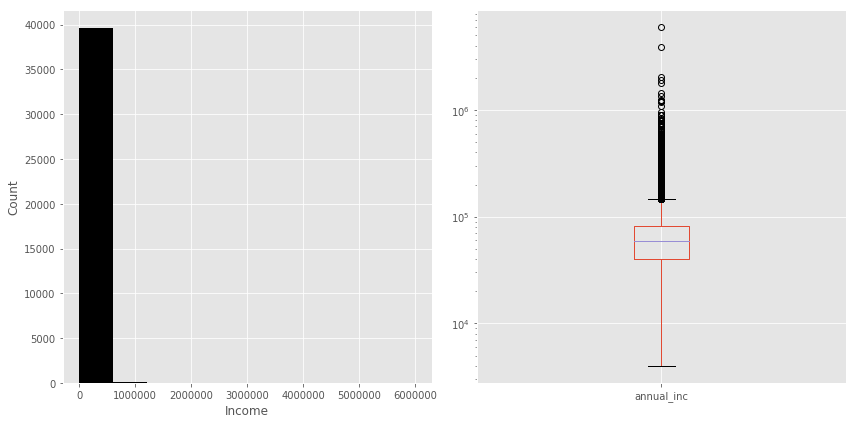

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


In [94]:
plt.figure(figsize = (12, 6))
plt.subplot(121)

df['annual_inc'].hist(color='k')
plt.xlabel("Income", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.subplot(122)
df['annual_inc'].plot(kind='box', logy=True)

plt.tight_layout()
plt.show()

print(df['annual_inc'].describe())

__*Above histogram is not clearly represented due to outliers. By removing outliers from the visualisation we can get a clearer picture of how income is distributed.*__

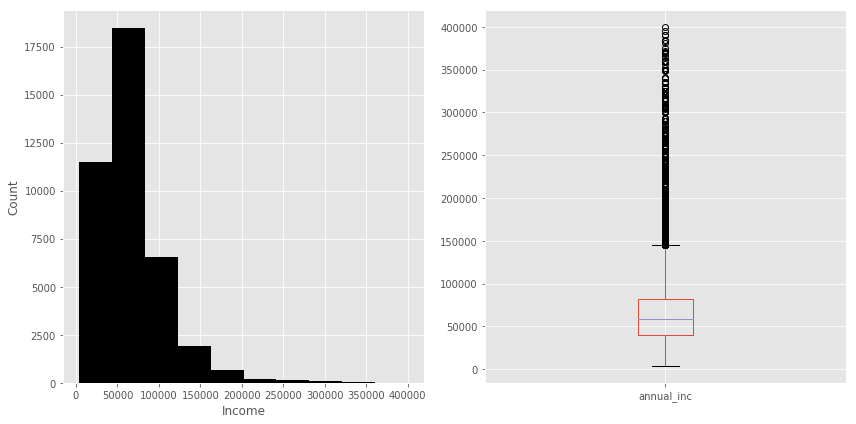

In [95]:
plt.figure(figsize = (12, 6))
plt.subplot(121)

df[df['annual_inc'] < 400000]['annual_inc'].hist(color='k')
plt.xlabel("Income", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.subplot(122)
df[df['annual_inc'] < 400000]['annual_inc'].plot(kind='box')

plt.tight_layout()
plt.show()

# Low Income: 100000 or less, Mid Income: Between 100000 to 200000, high Income: Above 200000
df['inc_cat'] = 'mid_inc'
df.loc[df['annual_inc'] <= 100000, 'inc_cat'] = 'low_inc'
df.loc[df['annual_inc'] > 200000, 'inc_cat'] = 'high_inc'

### Grouping the states into regions

United States are grouped into 5 Major Regions according to this information -> https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States

In [20]:
# Grouping the states into regions -> North_east, South_East, South_West, Mid_West, West
def finding_regions(state):
    north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']
    south_west = ['AZ', 'TX', 'NM', 'OK']
    south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
    west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
    mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
    
    if state in west:
        return 'west'
    elif state in south_west:
        return 'south_west'
    elif state in south_east:
        return 'south_east'
    elif state in mid_west:
        return 'mid_west'
    elif state in north_east:
        return 'north_east'
    

df['region'] = np.nan
df['region'] = df['addr_state'].apply(finding_regions)

In [21]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,defaulted,issue_year,issue_month,inc_cat,region
0,1077501,5000,5000,4975.0,36_months,10.65,162.87,B,B2,NaN,10+ years,rent,24000.0,verified,2011-12-01,fully_paid,credit_card,AZ,27.65,0,1985-01-01,1,NaN,NaN,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,0,0,2011,12,low_inc,south_west
1,1077430,2500,2500,2500.0,60_months,15.27,59.83,C,C4,ryder,< 1 year,rent,30000.0,source_verified,2011-12-01,charged_off,car,GA,1.00,0,1999-04-01,5,NaN,NaN,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0,1,2011,12,low_inc,south_east
2,1077175,2400,2400,2400.0,36_months,15.96,84.33,C,C5,NaN,10+ years,rent,12252.0,not_verified,2011-12-01,fully_paid,small_business,IL,8.72,0,2001-11-01,2,NaN,NaN,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-05-01,0,0,2011,12,low_inc,mid_west
3,1076863,10000,10000,10000.0,36_months,13.49,339.31,C,C1,air_resources_board,10+ years,rent,49200.0,source_verified,2011-12-01,fully_paid,other,CA,20.00,0,1996-02-01,1,35.0,NaN,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,NaT,2016-04-01,0,0,2011,12,low_inc,west
4,1075358,3000,3000,3000.0,60_months,12.69,67.79,B,B5,university_medical_group,1 year,rent,80000.0,source_verified,2011-12-01,current,other,OR,17.94,0,1996-01-01,0,38.0,NaN,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-06-01,2016-05-01,0,0,2011,12,low_inc,west


# EDA

__Loan_amnt:__ The loan amount requested by the borrower/applicant.

C:\Users\Aakash\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


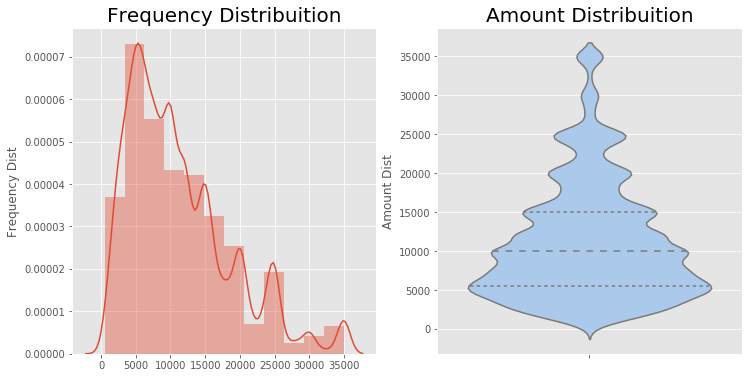

In [122]:
# Distribution Of Loan Amount

plt.figure(figsize=(12,6))

plt.subplot(121)
g = sns.distplot(df["loan_amnt"], bins=12)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition", fontsize=20)

plt.subplot(122)
g1 = sns.violinplot(y="loan_amnt", data=df, 
               inner="quartile", palette="pastel")
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Amount Dist", fontsize=12)
g1.set_title("Amount Distribuition", fontsize=20)

plt.show()

__Loan Status:__ This tells us whether the loan has been successfully paid off, has been written off (borrower has defaulted), or is currently in process.

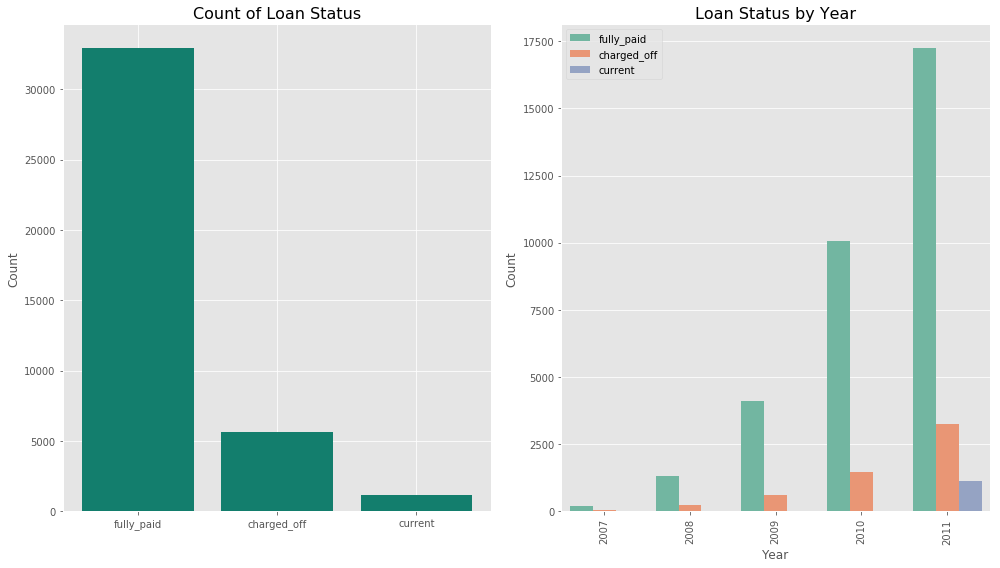

In [86]:
# Count of Loan Statuses
with plt.style.context('ggplot'):
    plt.figure(figsize = (14, 8))

    plt.subplot(121)
    x = df['loan_status'].unique()
    y = [len(df[df.loan_status == cat]) for cat in x]
    plt.title("Count of Loan Status", fontsize=16)
    plt.ylabel("Count", fontsize=12)
    plt.bar(x, y, color='xkcd:blue green')

    plt.subplot(122)
    g = sns.countplot(x='issue_year', data=df,
                      hue='loan_status', palette='Set2')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)
    g.set_xlabel("Year", fontsize=12)
    g.set_ylabel("Count", fontsize=12)
    g.legend(loc='upper left')
    g.set_title("Loan Status by Year", fontsize=16)

    plt.tight_layout()
    plt.show()

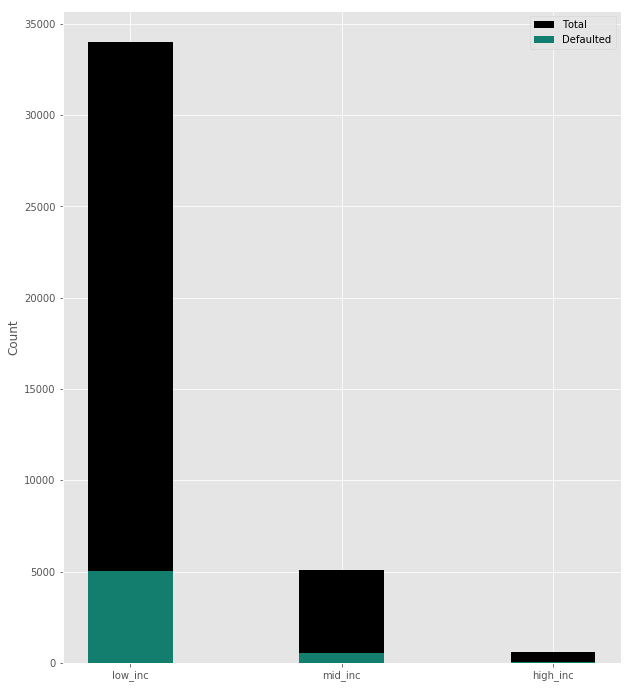

Ratio of defaulted to total for each income category:
low_inc: 14.8	mid_inc: 10.43	high_inc: 10.24	

In [96]:
# Count of 'income by category'
with plt.style.context('ggplot'):
    plt.figure(figsize = (10,12))

    x = df['inc_cat'].unique()
    y = np.array([len(df[df.inc_cat == cat]) for cat in x])
    y2 = np.array([len(df[(df.inc_cat == cat) & (df.defaulted == 1)]) for cat in x])

    plt.ylabel("Count", fontsize=12)
    plt.bar(x, y, width=0.4, color='k')
    plt.bar(x, y2, width=0.4, color='xkcd:blue green')
    plt.legend(labels=["Total", "Defaulted"])
    plt.show()

    print("Ratio of defaulted to total for each income category:")
    for inc_cat, pct in zip(x, y2/y):
        print(f"{inc_cat}: {round(pct*100, 2)}", end='\t')

Most borrowers belong in the low income category, just the defaulters make up for all borowers in the mid_income category.

__Grade:__ This is a grade assigned to a borrower depending on their credit history and likelyhood of repayment of loan. The better the grade, the lesser the interest rates on the loan.

__Sub Grade:__ Grades can further be divided into subgrades based on finer margins.

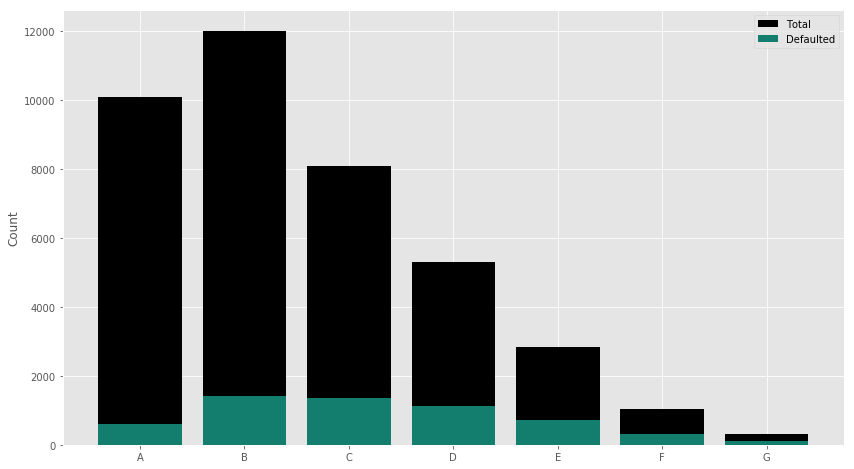

Ratio of defaulted to total for each grade:
A: 5.97	B: 11.86	C: 16.63	D: 21.07	E: 25.16	F: 30.41	G: 31.96	

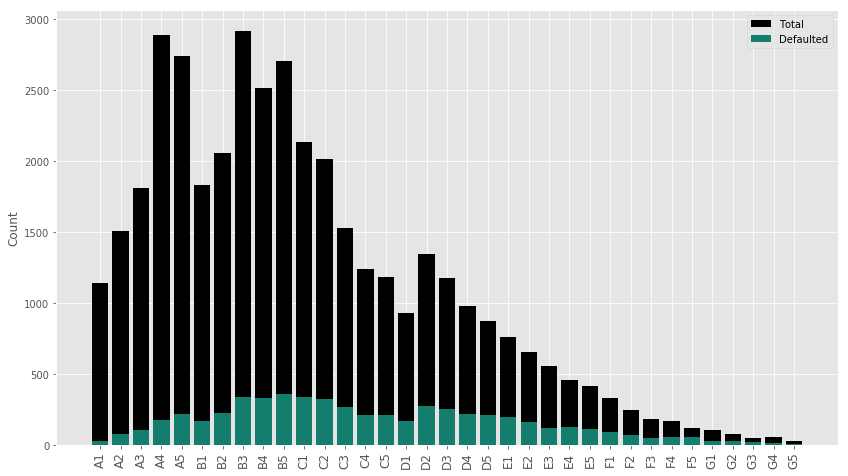

In [99]:
# Count of Grade and sub Grade

plt.figure(figsize = (14,8))

x = sorted(df['grade'].unique())
y = np.array([len(df[df.grade == cat]) for cat in x])
y2 = np.array([len(df[(df.grade == cat) & (df.defaulted == 1)]) for cat in x])

plt.bar(x, y, color='k')
plt.bar(x, y2, color='xkcd:blue green')
plt.ylabel("Count", fontsize=12)
plt.legend(labels=["Total", "Defaulted"])
plt.show()

print("Ratio of defaulted to total for each grade:")
for grade, pct in zip(x, y2/y):
    print(f"{grade}: {round(pct*100, 2)}", end='\t')

plt.figure(figsize = (14,8))
x = sorted(df['sub_grade'].unique())
y = [len(df[df.sub_grade == cat]) for cat in x]
y2 = [len(df[(df.sub_grade == cat) & (df.defaulted == 1)]) for cat in x]
plt.xticks(rotation='vertical', fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.bar(x, y, color='k')
plt.bar(x, y2, color='xkcd:blue green')
plt.legend(labels=["Total", "Defaulted"])
plt.show()

Although grade B and C loans have higher number of defaults, the highest default ratios are for grade F and G.

Below, we check how income is distributed among borrowers in bottom 3 grades E, F, G

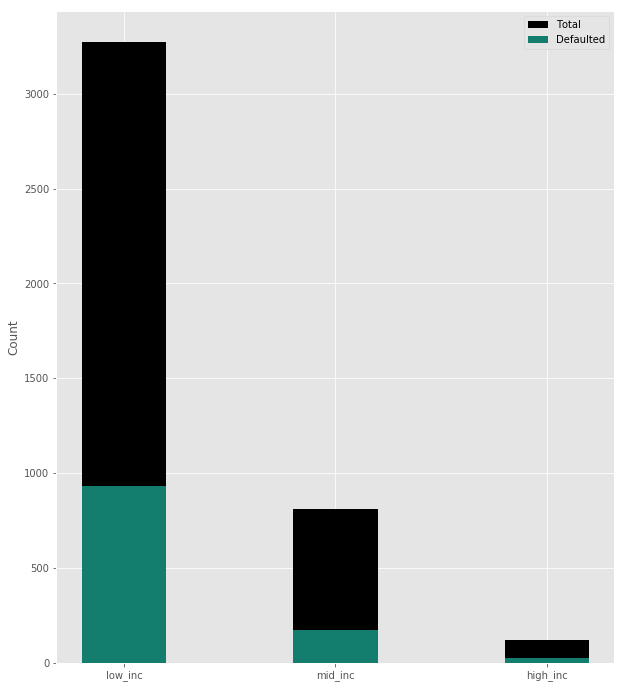

Ratio of defaulted to total for each income category:
low_inc: 28.47	mid_inc: 21.58	high_inc: 22.95	

In [102]:
# how income is distributed among borrowers in grade E, F, G
sub_df = df[(df['grade'] == 'E') | (df['grade'] == 'F') | (df['grade'] == 'G')]

plt.figure(figsize = (10,12))

x = sub_df['inc_cat'].unique()
y = np.array([len(sub_df[sub_df.inc_cat == cat]) for cat in x])
y2 = np.array([len(sub_df[(sub_df.inc_cat == cat) & (sub_df.defaulted == 1)]) for cat in x])

plt.ylabel("Count", fontsize=12)
plt.bar(x, y, width=0.4, color='k')
plt.bar(x, y2, width=0.4, color='xkcd:blue green')
plt.legend(labels=["Total", "Defaulted"])
plt.show()

print("Ratio of defaulted to total for each income category:")
for inc_cat, pct in zip(x, y2/y):
    print(f"{inc_cat}: {round(pct*100, 2)}", end='\t')

Finding high income individuals with a bad grade is uncommon. 28.5% of all low income borrowers from categories E, F, G tend to default.

__Verification Status:__ This indicates at what level the income of the borrower was verified.

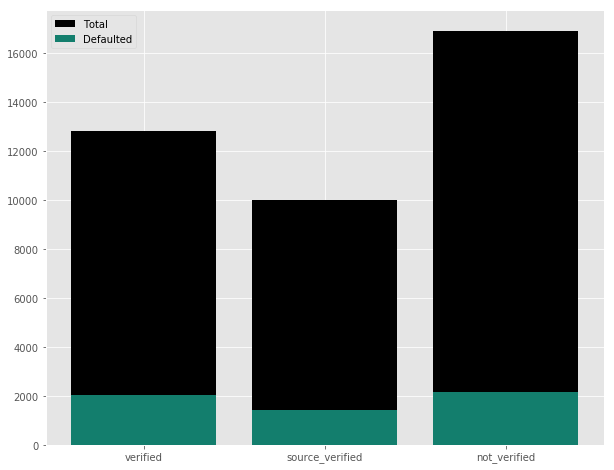

In [106]:
# Count of verification Status
plt.figure(figsize = (10,8))

x = df['verification_status'].unique()
y = [len(df[df.verification_status == cat]) for cat in x]
y2 = [len(df[(df.verification_status == cat) & (df.defaulted == 1)]) for cat in x]

plt.bar(x, y, color='k')
plt.bar(x, y2, color='xkcd:blue green')
plt.legend(labels=["Total", "Defaulted"])
plt.show()

No distinguishable characteristics exist between above categories.

__Term:__ Indicates number of payments the loan is divided into. It can either be 36 or 60.

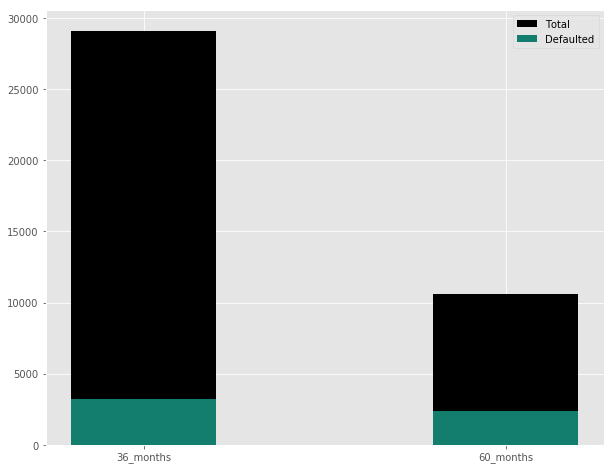

In [109]:
# Count of Term
plt.figure(figsize = (10,8))

x = df['term'].unique()
y = [len(df[df.term == cat]) for cat in x]
y2 = [len(df[(df.term == cat) & (df.defaulted == 1)]) for cat in x]
plt.bar(x, y, width=0.4, color='k')
plt.bar(x, y2, width=0.4, color='xkcd:blue green')
plt.legend(labels=["Total", "Defaulted"])
plt.show()

__pub_rec_bankruptcies:__ Public record of number of times borrower as filed for bankruptcy.

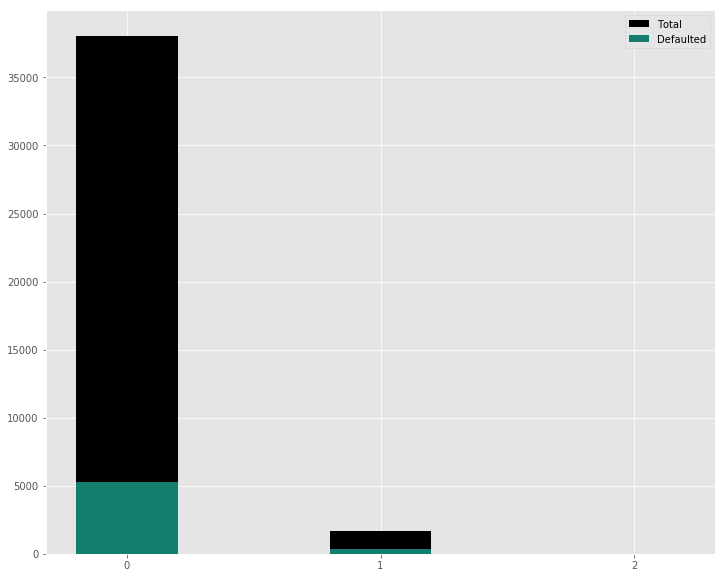

In [110]:
# Bankruptcies
plt.figure(figsize = (12,10))

x = ['0', '1', '2']
y = [len(df[df.pub_rec_bankruptcies == int(cat)]) for cat in x]
y2 = [len(df[(df.pub_rec_bankruptcies == int(cat)) & (df.defaulted == 1)]) for cat in x]
plt.bar(x, y, width=0.4, color='k')
plt.bar(x, y2, width=0.4, color='xkcd:blue green')
plt.legend(labels=["Total", "Defaulted"])
plt.show()

__emp_title:__ Indicates who the employer of the borrower is.

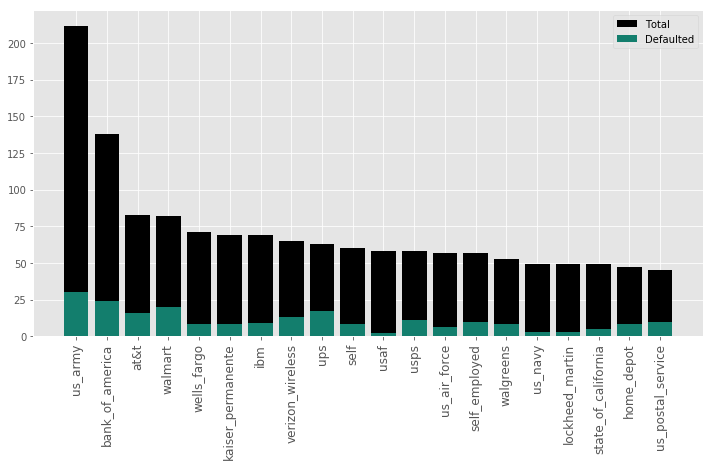

Ratio of defaulted to total seggregated by employment:
us_army: 14.15
bank_of_america: 17.39
at&t: 19.28
walmart: 24.39
wells_fargo: 11.27
kaiser_permanente: 11.59
ibm: 13.04
verizon_wireless: 20.0
ups: 26.98
self: 13.33
usaf: 3.45
usps: 18.97
us_air_force: 10.53
self_employed: 17.54
walgreens: 15.09
us_navy: 6.12
lockheed_martin: 6.12
state_of_california: 10.2
home_depot: 17.02
us_postal_service: 22.22


In [113]:
# Count of top 20 employment titles
emp_df = df.groupby('emp_title', as_index=False).agg({'id': 'count', 'defaulted': 'sum'}).sort_values('id', ascending=False).head(20)
plt.figure(figsize=(12,6))

x = emp_df['emp_title']
y = emp_df['id']
y2 = emp_df['defaulted']

plt.xticks(rotation='vertical', fontsize=12)
plt.bar(x, y, color='k')
plt.bar(x, y2, color='xkcd:blue green')
plt.legend(labels=["Total", "Defaulted"])
plt.show()

print("Ratio of defaulted to total seggregated by employment:")
for emp, pct in zip(x, y2/y):
    print(f"{emp}: {round(pct*100, 2)}")

Most number of borrowers are employed at the US Army followed by Bank Of America, but highest default ratios are from employees of: 

UPS: 27%

WALMART: 24.4%

US POSTAL: 22.22%


__emp_length:__ Number of years the borrower has spent in the work force.

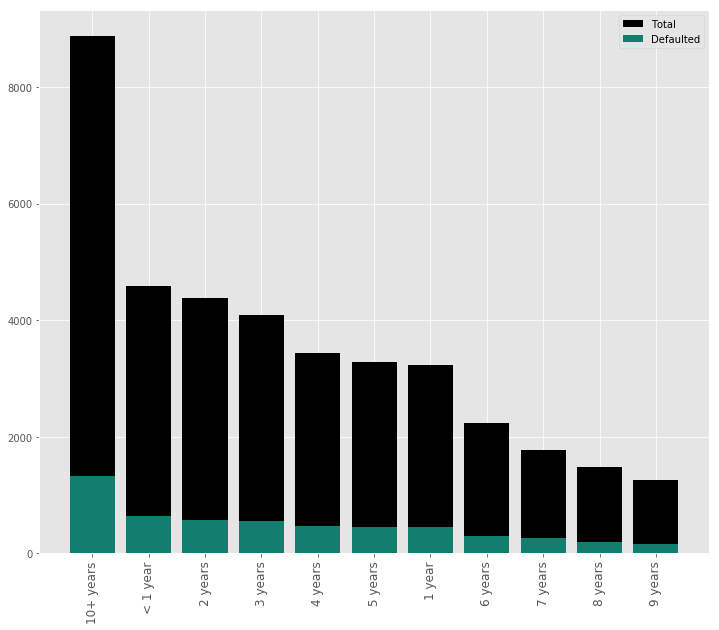

Ratio of defaulted to total seggregated by years of employment:
10+ years: 14.99
< 1 year: 13.94
2 years: 12.92
3 years: 13.55
4 years: 13.45
5 years: 13.95
1 year: 14.07
6 years: 13.77
7 years: 14.83
8 years: 13.73
9 years: 12.56


In [114]:
# Count of borrowers seggregated by length of employment
emp_df = df.groupby('emp_length', as_index=False).agg({'id': 'count', 'defaulted': 'sum'}).sort_values('id', ascending=False)
plt.figure(figsize=(12,10))

x = emp_df['emp_length']
y = emp_df['id']
y2 = emp_df['defaulted']

plt.xticks(rotation='vertical', fontsize=12)
plt.bar(x, y, color='k')
plt.bar(x, y2,color='xkcd:blue green')
plt.legend(labels=["Total", "Defaulted"])
plt.show()

print("Ratio of defaulted to total seggregated by years of employment:")
for emp, pct in zip(x, y2/y):
    print(f"{emp}: {round(pct*100, 2)}")

__Purpose:__ Purpose of taking a loan

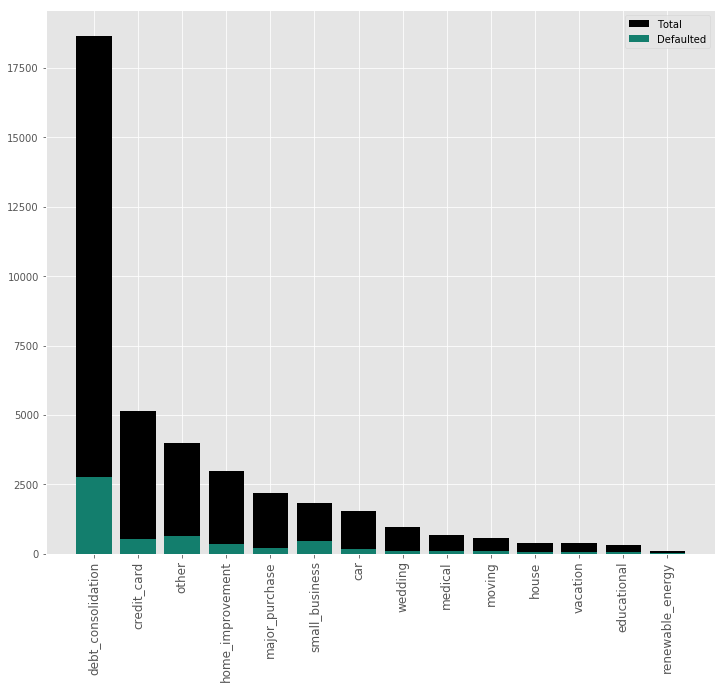

Ratio of defaulted to total seggregated by purpose:
debt_consolidation: 14.84
credit_card: 10.57
other: 15.85
home_improvement: 11.66
major_purchase: 10.15
small_business: 25.98
car: 10.33
wedding: 10.14
medical: 15.3
moving: 15.78
house: 15.49
vacation: 13.91
educational: 17.23
renewable_energy: 18.45


Debt consolidation is the most common reason to take a loan and makes up for 46.93% of client base


In [115]:
# Most frequently stated reasons
emp_df = df.groupby('purpose', as_index=False).agg({'id': 'count', 'defaulted': 'sum'}).sort_values('id', ascending=False).head(20)
plt.figure(figsize=(12,10))

x = emp_df['purpose']
y = emp_df['id']
y2 = emp_df['defaulted']

plt.xticks(rotation='vertical', fontsize=12)
plt.bar(x, y, color='k')
plt.bar(x, y2, color='xkcd:blue green')
plt.legend(labels=["Total", "Defaulted"])
plt.show()

print("Ratio of defaulted to total seggregated by purpose:")
for purpose, pct in zip(x, y2/y):
    print(f"{purpose}: {round(pct*100, 2)}")
    
print(f"\n\nDebt consolidation is the most common reason to take a loan and makes up for {round(len(df[df['purpose'] == 'debt_consolidation'])/len(df)*100, 2)}% of client base")

Highest default ratio exist for the small_buisness (26%) followed by renewable_energy (18.5%)

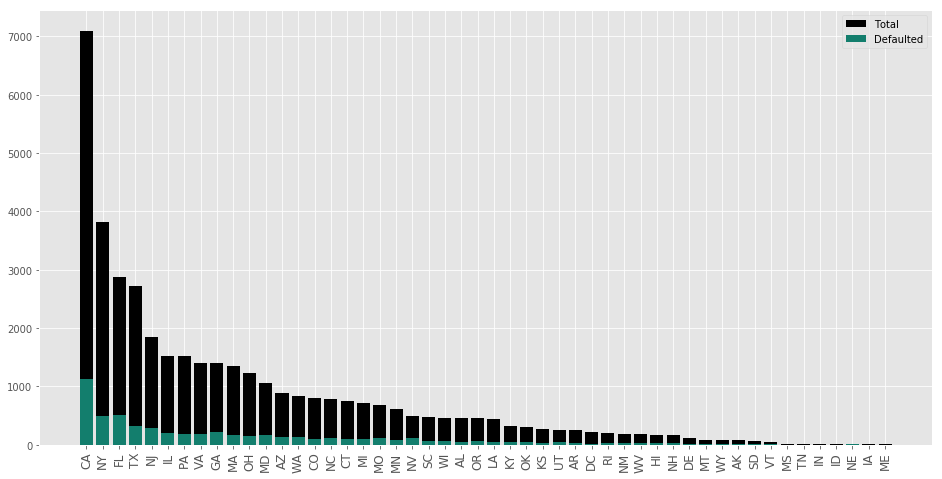

California (CA) is the state with highest number of borrowers at 7000 followed by New York (NY) at around 4000


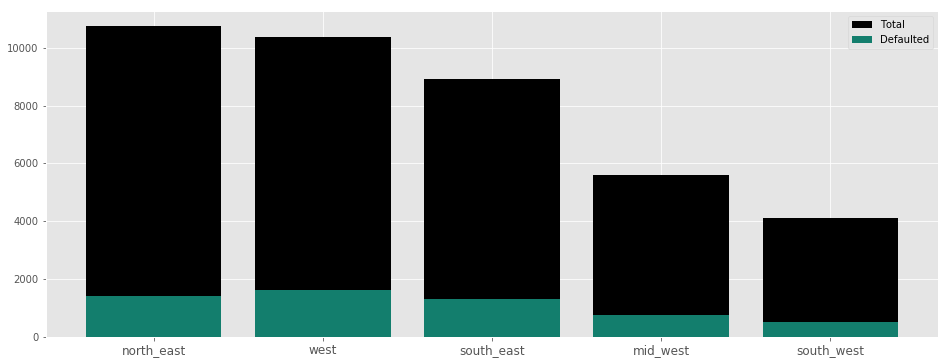

Ratio of defaulted to total seggregated by geographical region:
north_east: 13.25
west: 15.71
south_east: 14.64
mid_west: 13.59
south_west: 12.43


In [118]:
# Count of loans per state and region

state_df = df.groupby('addr_state', as_index=False).agg({'id': 'count', 'defaulted': 'sum'}).sort_values('id', ascending=False)
plt.figure(figsize=(16,8))

x = state_df['addr_state']
y = state_df['id']
y2 = state_df['defaulted']
plt.xticks(rotation='vertical', fontsize=12)
plt.bar(x, y, color='k')
plt.bar(x, y2,color='xkcd:blue green')
plt.legend(labels=["Total", "Defaulted"])
plt.show()

print("California (CA) is the state with highest number of borrowers at 7000 followed by New York (NY) at around 4000")

region_df = df.groupby('region', as_index=False).agg({'id': 'count', 'defaulted': 'sum'}).sort_values('id', ascending=False)
plt.figure(figsize=(16,6))

x = region_df['region']
y = region_df['id']
y2 = region_df['defaulted']
plt.xticks(fontsize=12)
plt.bar(x, y, color='k')
plt.bar(x, y2,color='xkcd:blue green')
plt.legend(labels=["Total", "Defaulted"])
plt.show()

print("Ratio of defaulted to total seggregated by geographical region:")
for region, pct in zip(x, y2/y):
    print(f"{region}: {round(pct*100, 2)}")

__Installments__: Monthly payment owed by the borrower.

C:\Users\Aakash\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


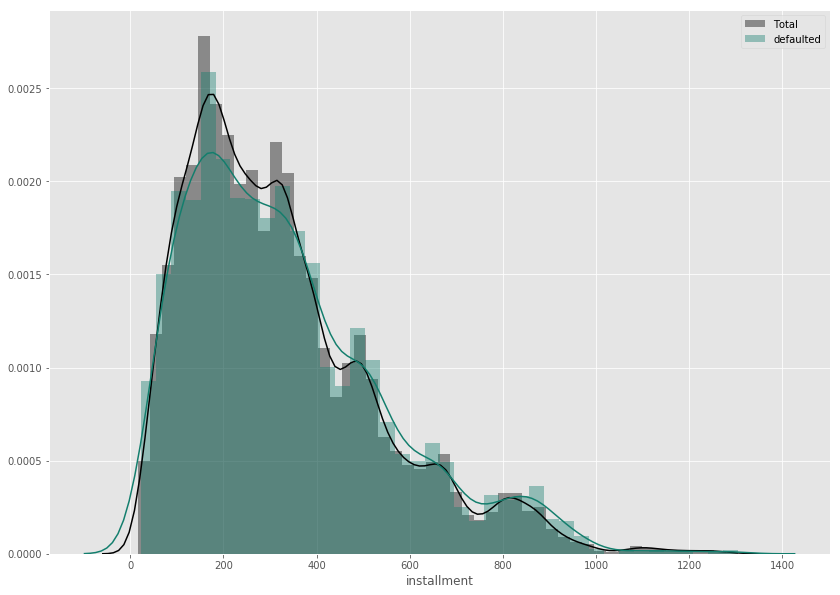

In [119]:
# distribution of installments 
plt.figure(figsize=(14,10))

sns.distplot(df['installment'], color='k')
sns.distplot(df[df['defaulted'] == 1]['installment'],color='xkcd:blue green')
plt.legend(['Total', 'defaulted'])
plt.show()

__Int_rate:__ The interest rate on the loan issued

C:\Users\Aakash\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


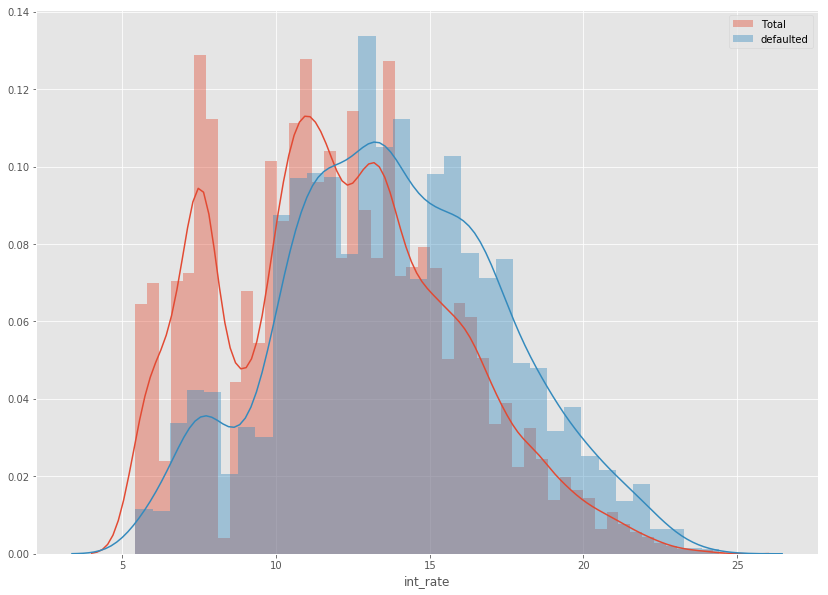

In [120]:
#distribution of int_rate
plt.figure(figsize=(14,10))

sns.distplot(df['int_rate'])
sns.distplot(df[df['defaulted'] == 1]['int_rate'])
plt.legend(['Total', 'defaulted'])
plt.show()


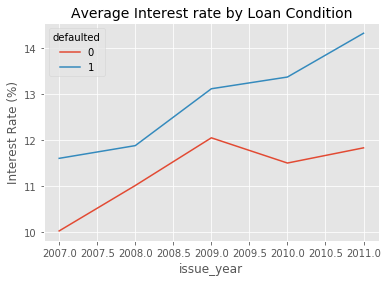

In [121]:
# avg interest rate per year
by_interest = df.groupby(['issue_year', 'defaulted']).int_rate.mean()

by_interest.unstack().plot()
plt.title('Average Interest rate by Loan Condition', fontsize=14)
plt.ylabel('Interest Rate (%)', fontsize=12)
plt.show()

On average, defaulters tend to have higher interest rates on their loans. This is likely due to the fact that their score/grade is low (thus a higher interest rate)

__total_rec_prncp:__ Principal amount recieved from borrower till date.

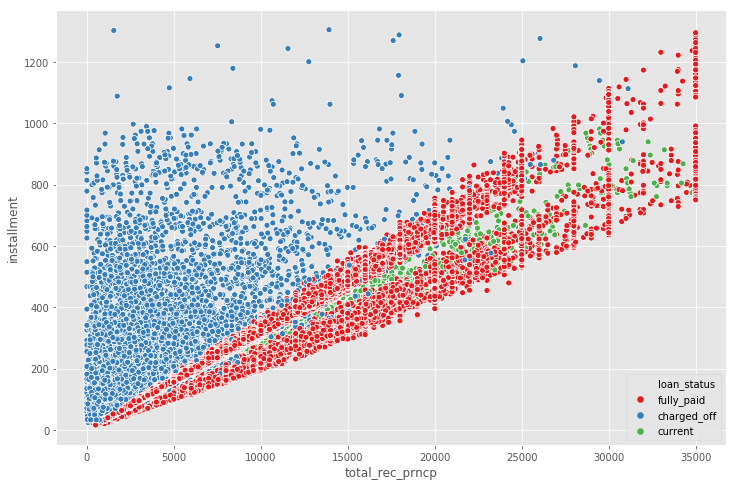

In [129]:
# total_rec_prncp vs installment
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='total_rec_prncp', y='installment', hue='loan_status', palette='Set1')
plt.show()

__total_pymnt:__ Payment recieved from borrower till date.

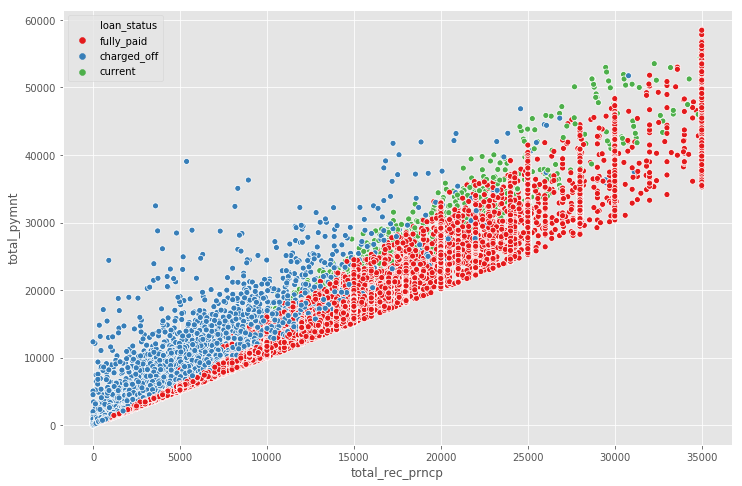

In [124]:
# total_rec_prncp vs total_pymnt
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='total_rec_prncp', y='total_pymnt', hue='loan_status', palette='Set1')
plt.show()

__total_rec_int:__ Interests recieved from borrower till date

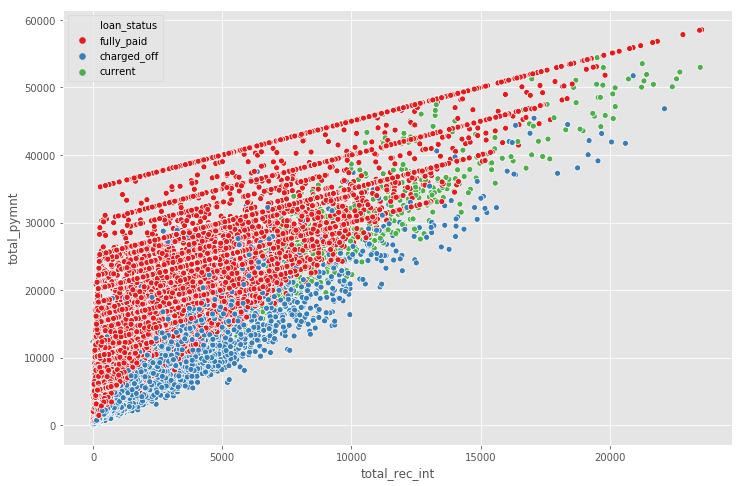

In [125]:
# total_rec_int vs total_pymnt
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='total_rec_int', y='total_pymnt', hue='loan_status', palette='Set1')
plt.show()

## Heatmap

Heatmmap will visually tell how the relevant features are correlated. 

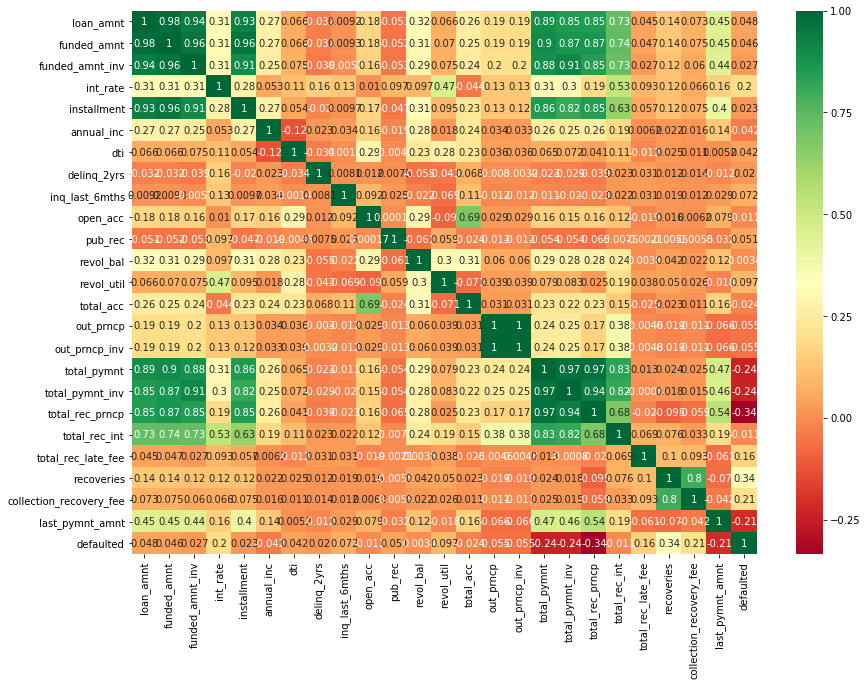

In [55]:
numeric_variables = df[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths', 'open_acc','pub_rec','revol_bal','revol_util','total_acc', 'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt', 'defaulted']]

plt.figure(figsize=(14, 10))
sns.heatmap(numeric_variables.corr(), cmap='RdYlGn', annot=True)
plt.show()

# Summary

#### Five significant predictors of a borrower defaulting are:

### Income:
Borrowers from the 'Low Income' category make up for 85.68% of the client base of loanees, which is an overwhelming majority. 15% of these tend to default their loan. Probability to default is 4% more in case of low income borrowers compared to mid and high income. 28.5% of all low income, bad grade (E, F, G) borrowers tend to default. 

### Grade:
Grade and rate of default are heavily inversely correlated. The highest default ratios are present for the three worst grades namely G: 31.96%   F: 30.41%   E: 25.16%

### Interest Rate:
There's a 20% positive correlation between interest rate and tendency to default. Interest rate is heavily correlated with grade as better the grade, lesser the interest rate. Therefore borrowers without a good grade (A, B) will recieve higher interest rates that decrease their chance of paying of their loan. (Thus increase chance of default.)

### Total Reccuring Principal:
There is a strong negative correlation (34%) between Total Reccuring Principal and tendency to default. This effect can be seen that defaulters usually have higher installment charges and higher total payments for an increasing value of TRP.

### Purpose of Loan: 
47% of borrowers stated 'Debt Consolidation' as pupose of loan and make up the majority of borrowers. The purpose with the highest default ratio is 'Small Buisness' (26%) followed by 'Renewable Energy' (18%).